### Uplift Моделирование (Введение)
Uplift Моделирование - раздел машинного обучения, основная задача которого - **находить определенный сегмент клиентов/пользователей.** Коммуникация с такимим пользователями, "должна" приводить к росту целевой метрики (uplift). 

#### Основные Термины
- **Сегмент**: пользоветли, положительно реагирующие на коммуникацию.
- **Задача**: осуществление целевого действия при коммуникации.

- **Коммуникация/Воздействие/Treatment**: скидка, участие в акции, смс/mail рассылка, ...
- **Target/Целевое Действие**: покупка/просмотр товара, установка приложения, отправка заявки, подписка, ...

#### Основные Группы
В Uplift моделировании обычно работают с 2-мя основными типами групп:
- **Целевая/Treatment Группа**: множество клиентов на которое мы воздействуем
- **Контрольная/Control Группа**: множество клиентов на которых мы не воздействуем

#### Примеры Правильного Использования Uplift Моделирования 
- **Продвижение Популярного Товара** (iPhone, Spotify, Apple Music):
    - *Treatment:* рекламная коммуникация (смс/mail рассылка)
    - *Target:* установка приложения, покупка товара
    
    Нужно найти тех, кто без рекламы не купи/установит. Нужно не коммуницировать с теми, кто купит/установит даже без рекламы. Если коммуницировать со всеми - быстро и неэффективно потратим маркетинговый бюджет.
    
- **Продвижение Дорого Товара** (Продажа квартир, машин)
    - *Treatment:* рекламная коммуникация (рекламы дома/машины)
    - *Target:* покупка дома/машины
    
#### Uplift + Модель Оттока
Модель оттока - модель, позволяющая находить пользователей, которые скоро перестанут пользоваться продуктом (отписка, удаление приложения/аккаунта). Такая комбинация позволяет найти пользователей, которые скоро уйдут и среди них выделить снова сегмент, который еще можно вернуть, если с ними провзаимодействовать (новое предложение, скидка, выгодное условие). Тратить бюджет на тех, кто и так уйдет в любом случае, не имеет смысла

### Виды Uplift Моделей

#### Response Models
Основная задача - обучить модель бинарной классификации различать клиентов, совершивших и не совершивших целевое действие при коммуникации с ними.
- *Обучающая Выборка:* взаимодействие с небольшой группой случайных клиентов. Совершившие целевое действие при коммуникации - позитивный класс, не совершившие - негативный
- *Оценка*: оценивает вероятность целевого действия при коммуникации

**Response модели оценивают вероятность целевого действия при условии коммуникации.**

Однако, на практике **не всегда есть информация о положительном классе.** В таком случае необходимо использовать Look-alike Models.

#### Look-alike Models
Используются, когда информации о положительном классе мало или недостаточно. Например, мы хотим рекомендовать велосипеды на сайте. Мы еще никак не коммуницировали с пользователями и хотели бы уже понять кому было бы полезно/релевантно рекламировать товар.

В таком случае мы можем определить положительный класс - пользователи, посмотревшие велосипеды или совершившие какие-либо действия с ними, остальные - негативный. Далее обучить модель на таких данных, и затем находить **пользователей, наиболее похожих на целевой класс** и показывать рекламу/баннер с товаром только им. 

- *Объекты*: клиенты 
- *Treatment*: показ рекомендации/баннера товара
- *Target*: просмотр товара

**Look-alike модели оценивают вероятность целевого действия на основе схожести объектов.**

#### Uplift Models 
Позволяют находить клиентов, котоыре совершат целевое действие, тогда и только тогда, когда с ними прокоммуницировать.

**Uplift модели оценивают разницу в поведении клиента при наличии воздействия и при его отсутствии.**

### Когда и Какие Модели Лучше Использовать?
- *Response/Look-alike:* не очень популярное целевое действие.
- *Uplift Models:* целевое действие популярно и выполняется клиентами с большой вероятностью, даже без коммуникаций.

**Примеры**

*Uplift Models:* реклама популярного продукта.

*Response/Look-alike:* реклама обычного продукта, целевое действие которого обычно осуществляется только при продвижении/рекламе. 

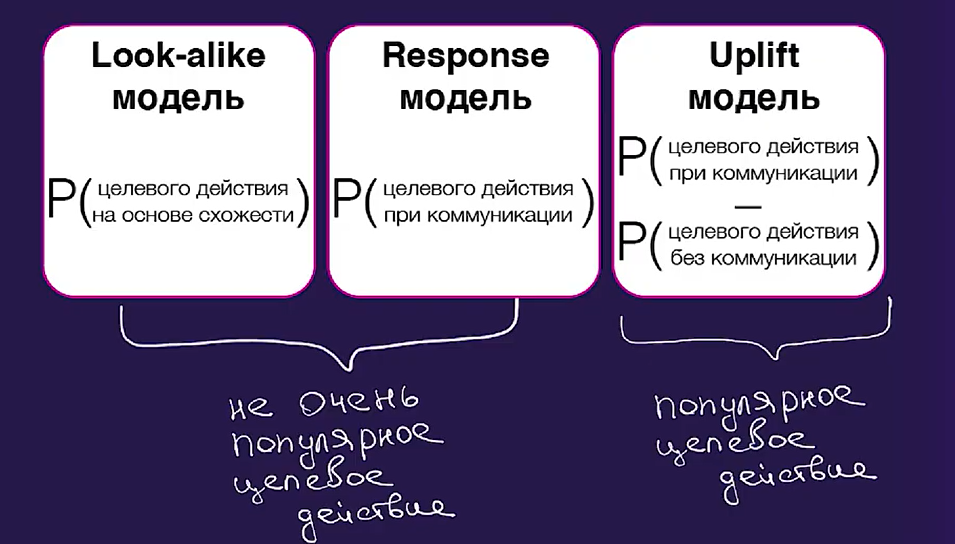

**А что будет если использовать uplift модель для непопулярного товара?**

В таком случае вероятность целевого действия (покупки) без коммуникации будет равна 0, следовательно, задача сведется к Response модели

### Математическая Постановка Задачи Uplift Моделирования 
- Множество всех объектов/пользователей: `I`
- Признаки объектов или ковариаты/covariates: `X`
- Treatment: `t = {0, 1}`

Каждый объект имеет потенциальный исход `y` - **potential outcomes** (реакции, происходящие при определенном treatment): `y(i)`. Признаки влияют на *potential outcomes* для каждого объекта *i*. Тогда *potential outcome* при условии на *treatment* можно записать: `y(i|t = 0) или y(i|t = 1)`. Однако, вектор признаков объекта также должен учитываться, тогда: `y(i|t, Xi)`

Задача, которую мы хотим решить - выяснить, влияет ли *treatment* на *potential outcomes*, т.е. для конкретного объекта/пользователя оценить изменение/дельту его реакции при treatment и без него. Однако в реально мире мы сталкиваемся с проблемой, называемой **casual inference**, т.е. мы **не можем одновременно прокоммуницировать и не прокоммуницировать с одним и тем же пользователем.**

Разница которую мы хотим оценить - **casual effect**

**Решение Проблемы Сasual Inference**

При достаточно больших выборках и случайном разделении на группы: Treatment и Control. Для каждого объекта найдется примерно похожий на него объект в другой группе. Таким образом мы сможем оценить разницу: `y(i|t = 1) - y(i|t = 0)` в двух группах на всех объектах - **Average Treatment Effect (ATE)**. Если еще учтем признаки, то получим: `y(i|t = 1, Xi) - y(i|t = 0, Xi)` - **Conditional Average Treatment Effect (CATE)**

Таким образом, **оценивая CATE по выборке, получим оценку uplift.**

### Типы Клиентов по Реакции на Коммуникацию 

Выделяют 4 основынх типа клиентов:
- **Убеждаемый:** клиенты, которые положительно реагируют на коммуникацию
    - Всегда хотим их найти. Иммено их хотим найти с помощью uplift модели  
- **Потерянный:** клиенты, которые никогда не совершат целевое действие при коммуникации
    - Создают дополнительные расходы
- **Не беспокоить:** клиенты, реагирующие негативно при коммуникации (отписка, удаление аккаунта)
    - Вызывают негативный эффект (снижение прибыли)
- **Лояльный:** клиенты, реагирующие положительно несмотря ни на что
    - Также лучше не взаимодействовать, купят и без скидки

**Не все типы клиентов могут присутствовать** для конкретной маркетинговой компании. Также **выполнение целевого действия сильно зависит от характеристик маркетинговой компании**
- *Каналы взаимодействия:* sms, push, рассылка, ...
- *Тип взаимодействия:* скидка, акция, бонусы, ...
- *"Размер взаимодействия"*: размер скидки, размер бонусов, ...

Очень важно **правильно определить** данные параметры чтобы **маркетинговая компания была эффективна**

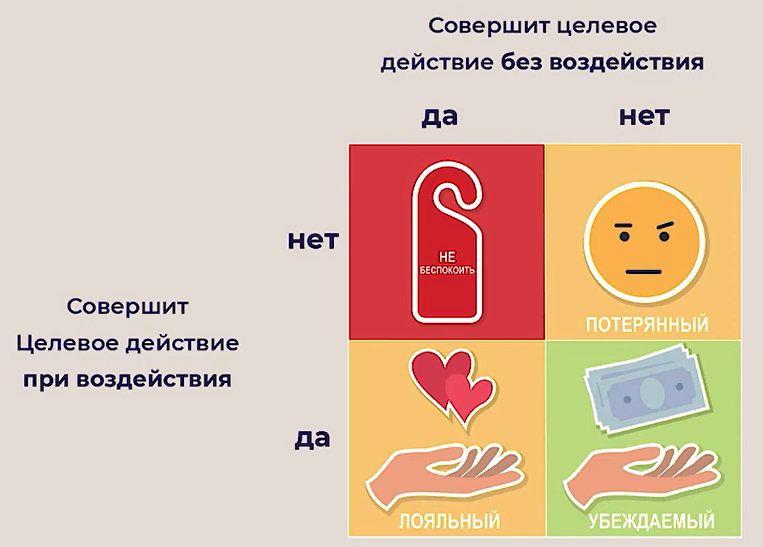

### Классы Клиентов 
Для решения проблемы *casual inference* можно случайно разбить клиентов на 2 группы: Treatmnet и Control и получить 4 непересекающихся класса:
- **Control Responder (СR)**: осуществление целевого действия без коммуникации
- **Control Non Responder (CN)**: не осуществление целевого действия без коммуникации 
- **Treatment Responder (TR)**: осуществление целевого действия при коммуникации
- **Treatment Non Responder (TN)**: не осуществление целевого действия при коммуникации

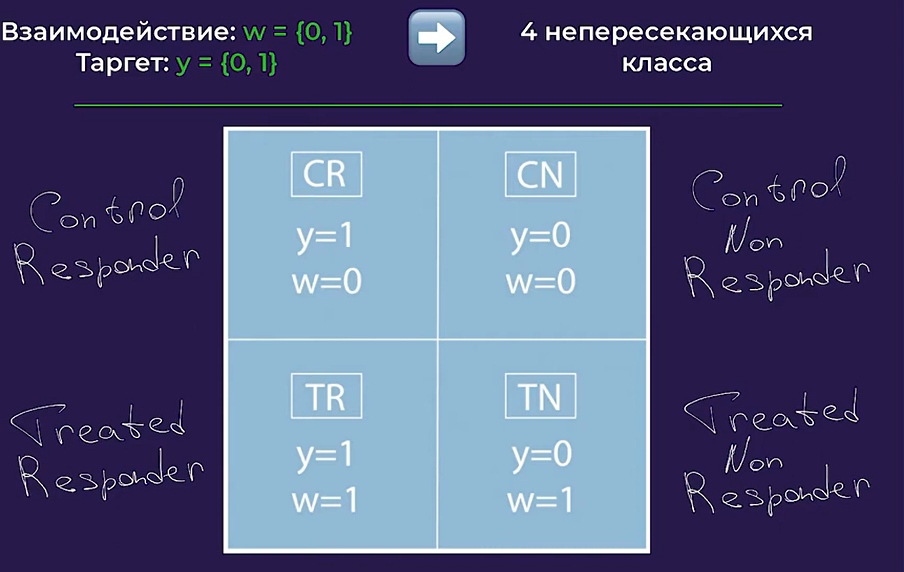

**Для построениея Uplift модели необходимо наличие все 4 классов!!!**

### Связь Классов Клиентов

Классы клиентов CR, CN, TR, TN **можно наблюдать** по реакции на коммуникацию, а **сами типы клиентов (лояльный, не беспокоить) мы наблюдать не можем**. **Каждый из 4 классов может содержать по 2 типа клиентов одновременно**:

- *CR: Не беспокоить либо лояльный*
    - Не знаем выполнил бы он целевое действие при взаимодействии
    - Целевое действие без коммуникации и при ней -> Лояльный 
    - Целевое действие без коммуникации -> Не беспокоить
    
- *СN: Потерянный либо убеждаемый*
    - Нет целевого действия без коммуникации и при ней -> Потерянный 
    - Возможно бы совершил целевое действие при коммуникации -> Убеждаемый
    
- *TR: Лояльный либо убеждаемый*
    - Целевое действие при коммуникации и без неё -> Лояльный 
    - Совершил целевое действие при коммуникации -> Убеждаемый
    
- *TN: Не беспокоить либо потерянный*
    - Нет целевого действия без коммуникации и при ней -> Потерянный  
    - ...
    
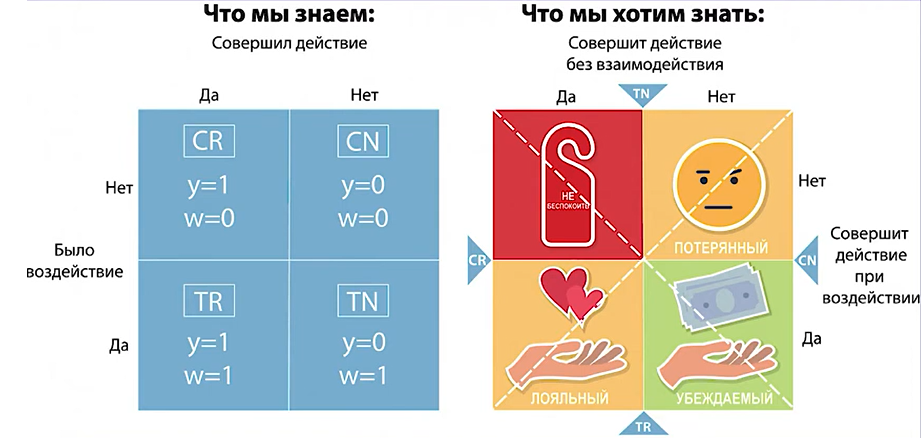

Uplift моедль направлена на то, чтобы находить **убеждаемых клиентов**, которых мы **должны искать среди TR и CN клиентов**

### Сбор Обучающей Выборки для Uplift Модели
Так как мы имее проблему casual inference, то мы особым образом должны подходить к сбору обучающей выборки. А для сравнения 2-х моделей/подходов (с взаимодействием и без взаимодейтвия) мы должны провести А/B тест.

#### Дизайн A/B теста
Перед проведением теста необходимо зафиксировать его дизайн:
1. Сбор репрезентативной **выборки для обучения модели** (случайно отберем репрезентативное подмножество клиентов)
2. Зафиксировать признаки клиентов (пол, возраст, время на странице, ...)
3. Зафиксировать тип взаимодействия и его размер (маленькая/большая скида, бонус, ...)
4. Зафиксировать целевое действие (покупка, клик, подписка, ...)
5. Данные для обучения модели необходимо снова разбить случайно на 2 группы: Контрольная и Тестовая
    - Тестовая: будет получать воздействие (смс, скидка).
    - Контрольная: не будет получать воздействие.
    - Проверить случайность двух групп можно при помощи трюка - подмена задачи.
    
    
**Как проверить репрезентативность и случайность выборки?**

Необходимо воспользоваться трюком - подмена задачи. Все объекты из выборки для обучения модели обозначим как 1, а всю остальну часть данных как 0 (объекты, не вошедшие в выборку для обучения модели). Далее необходимо обучить модель бинарной классификации и посмотреть **как хорошо модель различает два класса. Мы ожидаем, что модель не различает их между собой,** т.е. нет зависимостей, позволяющих модели различать объекты - значит все объекты похожи между собой, и наша выборка является репрезентативной и случайной (ROC-AUC ~ 0.5)
    
#### Алгоритм Прогнозирования Uplift 
1. Собрать данные **наших групп** и посмотреть, какие клиенты **выполнили целевое действие, а какие нет.** Именно эти данные позволят нам построить модель прогнозирования uplift.
2. Обучить модель Uplift на пользователях 2- групп (каждый клиент получает определенный score)
3. Прогоняем оставшихся клиентов (не участвоваших в обучении) через модель и получим их score distribution
    - Небольшую часть всей базы клиентов необходимо оставить для нового обучения модели
4. Определим cut-off score для определения клиентов с которыми мы будем взаимодействовать.
5. Снова разобьем таких клиентов на 2 группы: Тестовая и Контрольная

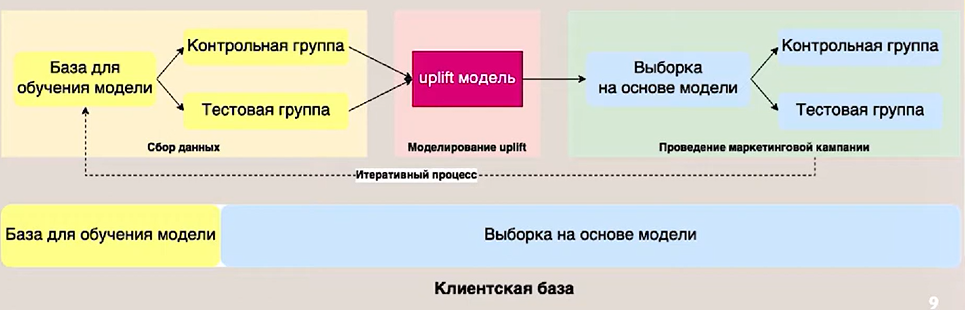

**Важно не изменять параметры/дизайн маркетинговой компании** (размер скидки, вид взаимодействия). Изменение вносит bias и делает результаты менее надежными.  

#### Можно ли использовать клиентов из теста для нового обучения?
Спустя некоторое время, прихоится выбирать новых клиентов и обучать модель снова. Основная проблема - **клиенты которые были в Контрольной и Тестовой группах при тестировании - не случайны (отбирали по score).** Однако, такие данные предоставляют большую ценность и хотелось бы их исползовать, но мы не можем это сделать, так как иначе они будут вносить смещение. 

Для уменьшения эффекта данного смещения используют следующий подход - необходимо оставить небольшую часть клиентов для будущего обучения, также разбить их случайным образом на 2 группы, и когда необходимо будет обучить модель снова - использовать данные группы для обучения новой uplift модели.
Также данная выборка будет свляется хорошей оценкой эффективности компании. 

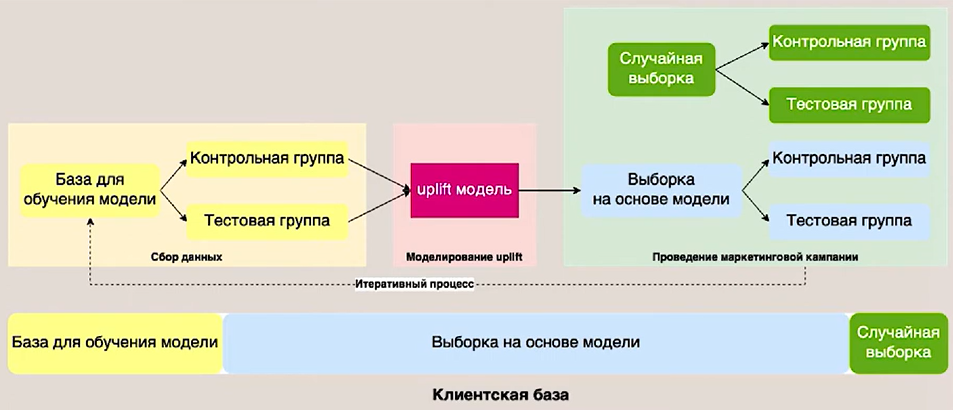

### Дизайн А/B Теста при Сравнении Uplift Моделей
Предположим, что мы имеем несколко моделей: 2 Uplift модели и 1 Response модель. Возникает вопрос:
- Как правильно сравнить их между собой?
- На каких группах (тестовой или контрольной) считать метрики?

Предположим мы обучили 2 модели (Response и Uplift) и теперь хотим проскорить новых клиентов через эти 2 модели. Для честного сравнения необходимо случайно разбить новых клиентов на половинки - поливна для Uplift, половина для Response. При помощи подмены задачи убеждаемся, что выборки разбиты случайно и репрезентативны.

Сравним метрики в тестовых группах для данных моделей, т.к. мы строим uplift модель, то товар который мы продвигаем и так достаточно популярный. Значит Response модель должна найти много лояльных клиентов, и значении метрики в тестовой группе будет достаточно высоким. В случаем uplift модели, значение метрики в тестовой группе будет ниже, так как хорошая uplift модель находит убеждаемых клиентов, а не лояльных. Лояльные клиенты попадут в контрольную группу. Такое сравнение некорректно, uplift модель в любом случае проиграет.

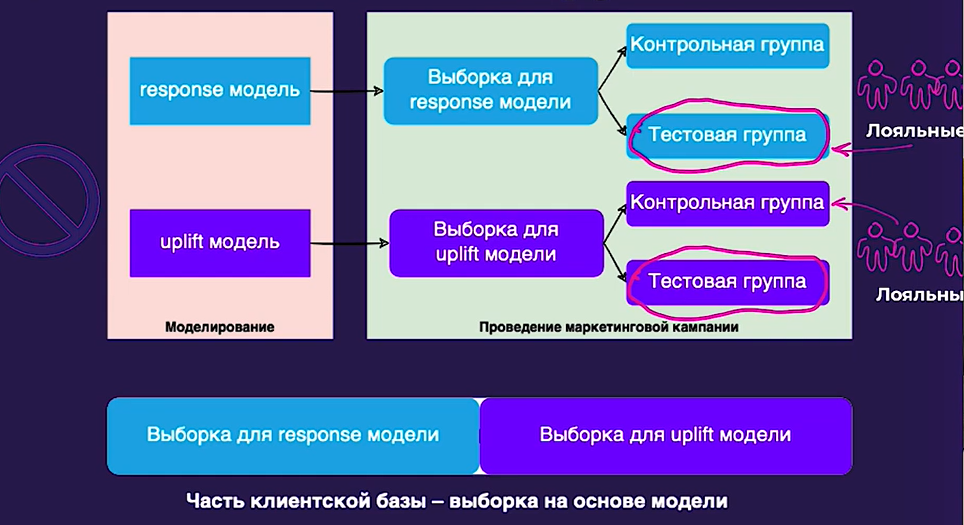

**Решение** - сравнивать метрики на всех клиентах (во всех группах)

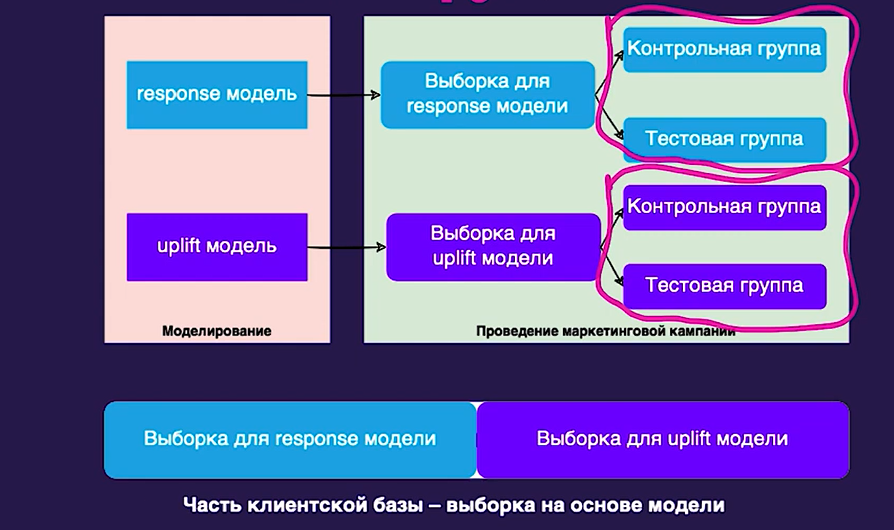

Аналогично необходимо сравнивать другие модели/подходы с Uplift моделями -> сравнивать метрики на всех группах (на контрольной и тестовой группах вместе)

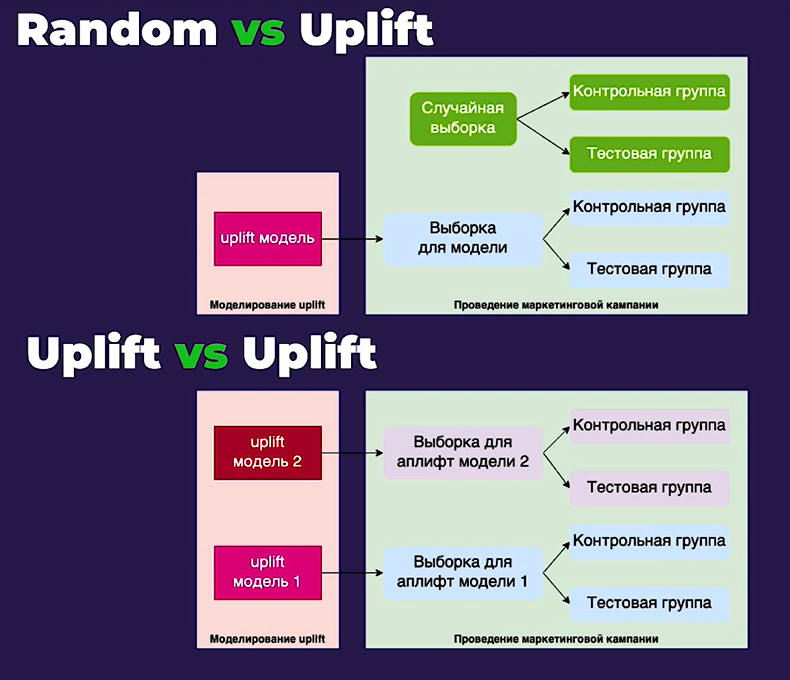